# BERTopic - Tutorial

In [9]:
!pip install bertopic

     |████████████████████████████████| 40kB 4.5MB/s 
     |████████████████████████████████| 81kB 6.3MB/s 
     |████████████████████████████████| 15.3MB 273kB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 13.2MB 19.7MB/s 
     |████████████████████████████████| 6.4MB 33.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.2MB 37.4MB/s 
     |████████████████████████████████| 2.1MB 39.4MB/s 
     |████████████████████████████████| 1.2MB 40.2MB/s 
     |████████████████████████████████| 901kB 33.9MB/s 
     |████████████████████████████████| 3.3MB 35.8MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311702 sha256=9ca20a4e6f8bc5de412345eb56654798edd6e6eed13f4a077ee9852d7efae392
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff

In [ ]:
pip install bertopic[visualization] --quiet

     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 6.4MB 9.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 13.2MB 63.1MB/s 
     |████████████████████████████████| 2.0MB 54.8MB/s 
     |████████████████████████████████| 1.2MB 56.7MB/s 
     |████████████████████████████████| 1.2MB 49.5MB/s 
     |████████████████████████████████| 3.2MB 50.7MB/s 
     |████████████████████████████████| 890kB 60.2MB/s 


# Imports

In [3]:
import numpy as np
import pandas as pd 
from copy import deepcopy


# Load Data

In [91]:
from google.colab import files
uploaded=files.upload()

Saving Abstracts1.xlsx to Abstracts1 (2).xlsx


In [92]:
import io
df= pd.read_excel(io.BytesIO(uploaded['Abstracts1.xlsx']))

In [93]:
df.head()

,Abstract
0,"BACKGROUND: In December 2019, COVID-19 broke out in Wuhan, China, leading to national and intern..."
1,BACKGROUND: The recent coronavirus disease (COVID-19) pandemic is taking a toll on the world's h...
2,Hamad General Hospital Anticoagulation Clinic is one of the largest collaborative-practice clini...
3,"In December 2019, a cluster of atypical Pneumonia cases in Wuhan, China were reported to the Wor..."
4,"Since the outbreak of the COVID-19 pandemic, many healthcare facilities have suffered from short..."


In [94]:
df.shape

(1519, 1)

In [95]:
docs=list(df.loc[:, 'Abstract'].values)

In [96]:
#docs[:100]

# Creating Topics

In [1]:
from bertopic import BERTopic

In [10]:
model1 = BERTopic(nr_topics=19)

In [12]:
new_topics, new_probs  = model1.fit_transform(docs)

# Extract most frequent topics

In [13]:
model1.get_topic_freq().head()

,Topic,Count
0,3,1231
1,2,133
2,-1,99
3,1,29
4,0,27


In [14]:
model1.get_topic_freq(1)

29

# Extract Individual topics

In [16]:
model1.get_topic(-1)

[('covid19', 0.036886876501345825),
 ('patients', 0.029556462116973506),
 ('health', 0.02016011216075834),
 ('data', 0.016504889284250656),
 ('study', 0.015831556700446697),
 ('among', 0.01492199303536397),
 ('2020', 0.014888007428736588),
 ('daily', 0.014755207008403132),
 ('countries', 0.014736339372698132),
 ('students', 0.013579563854148742)]

In [18]:
model1.get_topic(0)

[('diabetes', 0.13794998151866728),
 ('patients', 0.10075556245506097),
 ('covid19', 0.060305800790890755),
 ('mortality', 0.03921807227843391),
 ('diabetic', 0.03866849145374172),
 ('comorbidities', 0.026347700261988884),
 ('outcomes', 0.021155989569572174),
 ('hyperglycemia', 0.020342665577329565),
 ('disease', 0.0200069636733112),
 ('clinical', 0.019611759725507893)]

In [19]:
model1.get_topic(1)

[('dental', 0.123796875667719),
 ('covid19', 0.04805536783237778),
 ('academics', 0.043241518010584165),
 ('dentists', 0.04130246317060386),
 ('students', 0.034812496774356376),
 ('knowledge', 0.03197581963981924),
 ('health', 0.022723151114635128),
 ('professional', 0.020255347796153896),
 ('clinical', 0.020042357244431222),
 ('online', 0.019259889524892507)]

In [20]:
model1.get_topic(2)

[('covid19', 0.046558182814609515),
 ('iran', 0.03849396460176816),
 ('patients', 0.0347430868180407),
 ('study', 0.026915922136095293),
 ('cases', 0.02183073724888718),
 ('2020', 0.020614089228971094),
 ('ci', 0.017605092980154523),
 ('methods', 0.014712293605918908),
 ('95', 0.014309311375192866),
 ('women', 0.014022505913350537)]

In [21]:
model1.get_topic(3)

[('covid19', 0.0396534946345895),
 ('were', 0.024250991186994312),
 ('patients', 0.023527897300863663),
 ('was', 0.02338379156199351),
 ('pandemic', 0.0180393591416029),
 ('disease', 0.01772433301855144),
 ('health', 0.01713556067729245),
 ('coronavirus', 0.015913872441108992),
 ('sarscov2', 0.015536996779069475),
 ('study', 0.014107611354772783)]

# Topic Modeling using sklearn

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
cv=CountVectorizer(max_df=0.9,min_df=2,stop_words='english')

In [99]:
dtm= cv.fit_transform(df['Abstract'])

In [100]:
from sklearn.decomposition import LatentDirichletAllocation

In [101]:
LDA = LatentDirichletAllocation(n_components=5 , random_state=42)

In [102]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [103]:
len(cv.get_feature_names())

7810

In [104]:
import random

In [105]:
random_word_id = random.randint(0,1396)
cv.get_feature_names()[random_word_id]

'abdullah'

In [106]:
LDA

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [107]:
LDA.components_.shape

(5, 7810)

In [108]:
single_topic= LDA.components_[0]

In [109]:
single_topic.argsort()

array([5354, 2838, 5001, ..., 2056, 2103, 6381])

In [110]:
import numpy as np

In [111]:
single_topic.argsort()[-10:]

array([7075, 3874, 6555, 7625, 5296, 2494, 6217, 2056, 2103, 6381])

In [112]:
top_twenty_words = single_topic.argsort()[-20:]

In [113]:
for index in top_twenty_words:
    print(cv.get_feature_names()[index])

novel
immune
human
review
pandemic
viral
clinical
treatment
2019
acute
syndrome
infection
severe
virus
patients
disease
respiratory
coronavirus
cov
sars


In [114]:
#Grab the highest probability word per topic
for index,topic in enumerate(LDA.components_):
    print(f"The Top tewnty words for topic number {index}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-20:]])
    print('\n')
    print('\n')

The Top tewnty words for topic number 0
['novel', 'immune', 'human', 'review', 'pandemic', 'viral', 'clinical', 'treatment', '2019', 'acute', 'syndrome', 'infection', 'severe', 'virus', 'patients', 'disease', 'respiratory', 'coronavirus', 'cov', 'sars']




The Top tewnty words for topic number 1
['coronavirus', 'age', 'severe', 'methods', 'infection', 'clinical', 'data', 'risk', 'cov', 'sars', 'studies', 'mortality', 'results', '2020', 'study', 'ci', 'disease', '95', 'cases', 'patients']




The Top tewnty words for topic number 2
['coronavirus', 'control', 'information', 'world', '2020', 'outbreak', 'social', 'number', 'results', 'cases', 'impact', 'measures', 'disease', 'risk', 'data', 'public', 'care', 'countries', 'pandemic', 'health']




The Top tewnty words for topic number 3
['mental', 'significantly', 'stress', 'hospital', 'associated', 'clinical', 'psychological', 'higher', '2020', 'pandemic', 'depression', 'using', 'health', 'results', 'group', 'students', 'participants', '

In [115]:
topic_results = LDA.transform(dtm)

In [116]:
topic_results.shape

(1519, 5)

In [117]:
# finding the highest index of topic probability for each article 
# let us create a new index that will indicate the number of topic for each article
df['Topic']= topic_results.argmax(axis=1)

In [118]:
df.head(30)

,Abstract,Topic
0,"BACKGROUND: In December 2019, COVID-19 broke out in Wuhan, China, leading to national and intern...",1
1,BACKGROUND: The recent coronavirus disease (COVID-19) pandemic is taking a toll on the world's h...,4
2,Hamad General Hospital Anticoagulation Clinic is one of the largest collaborative-practice clini...,2
3,"In December 2019, a cluster of atypical Pneumonia cases in Wuhan, China were reported to the Wor...",2
4,"Since the outbreak of the COVID-19 pandemic, many healthcare facilities have suffered from short...",2
5,We document two cases of viremic and prolonged active infection with the severe acute respirator...,1
6,BACKGROUND: Risk of reinfection with severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2...,1
7,SARS-COV-2 has created one of the most massive pandemics in modern history. There is a rapid acc...,0
8,The COVID-19 pandemic is caused by the severe acute-respiratory-syndrome-coronavirus-2 that uses...,0
9,OBJECTIVE: To define the epidemiological curve of COVID-19 in Qatar and determine factors associ...,1


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df['Topic'].value_counts()

2    434
1    395
0    360
3    167
4    163
Name: Topic, dtype: int64

In [121]:
#pip install pyLDAvis==3.2.2

In [122]:
import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [124]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

In [126]:
df['Abstract']=df['Abstract'].apply(remove_stopwords)

In [52]:
import spacy

In [53]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [127]:
def lemmatization(texts,allowed_postags=['NOUN', 'VERB', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [128]:
# i used this package to hide the long output
#!pip install -q gwpy
# before you code, enter %%capture

In [129]:
%%capture
text_list=df['Abstract'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

In [133]:
print(tokenized_reviews[1])

['background', 'recent', 'coronavirus', 'disease', 'pandemic', 'take', 'toll', 'world', 'health', 'care', 'infrastructure', 'social', 'economic', 'psychological', 'humanity', 'individual', 'organization', 'government', 'use', 'social', 'medium', 'communicate', 'number', 'issue', 'relate', 'covid-19', 'pandemic', 'know', 'topic', 'share', 'social', 'medium', 'platform', 'relate', 'covid-19', 'analyze', 'information', 'help', 'policy', 'maker', 'health', 'care', 'organization', 'assess', 'need', 'stakeholder', 'address', 'objective', 'study', 'aim', 'identify', 'main', 'topic', 'post', 'user', 'relate', 'covid-19', 'pandemic', 'leverage', 'set', 'tool', 'search', 'application', 'programming', 'interface', 'library', 'database', 'use', 'set', 'predefine', 'search', 'term', 'corona', 'covid-19', 'extract', 'text', 'metadata', 'number', 'like', 'retweet', 'user', 'profile', 'information', 'include', 'number', 'follower', 'public', 'english', 'language', 'tweet', 'analyze', 'collect', 'tweet

In [ ]:
from spacy import displacy
nlp1 = spacy.load('en_core_web_sm')

In [ ]:
doc=nlp1(text_list[0])
displacy.render(doc,style='ent',jupyter=True)

In [ ]:
doc.ents

(December 2019,
 Wuhan,
 China,
 first,
 PRISMA-ScR,
 MEDLINE,
 EMBASE,
 PsycInfo,
 April 10 12, 2020,
 Two,
 82,
 435)

In [130]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [131]:
%%capture
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=90, passes=50,iterations=100)

In [132]:
lda_model.print_topics()

[(0,
  '0.067*"%" + 0.026*"study" + 0.022*"covid-19" + 0.022*"participant" + 0.020*"student" + 0.017*"survey" + 0.017*"use" + 0.015*"knowledge" + 0.015*"score" + 0.014*"level"'),
 (1,
  '0.015*"app" + 0.014*"human" + 0.014*"technology" + 0.011*"sequence" + 0.009*"propose" + 0.009*"framework" + 0.008*"team" + 0.008*"bat" + 0.007*"design" + 0.007*"surface"'),
 (2,
  '0.033*"trial" + 0.025*"control" + 0.024*"pharmacist" + 0.021*"receive" + 0.020*"day" + 0.018*"procedure" + 0.016*"dose" + 0.016*"pharmacy" + 0.013*"drug" + 0.010*"cost"'),
 (3,
  '0.040*"cancer" + 0.022*"pandemic" + 0.019*"surgery" + 0.017*"stroke" + 0.016*"change" + 0.014*"hand" + 0.014*"practice" + 0.013*"emergency" + 0.012*"guideline" + 0.012*"air"'),
 (4,
  '0.020*"respiratory" + 0.018*"severe" + 0.017*"acute" + 0.017*"covid-19" + 0.016*"disease" + 0.015*"infection" + 0.015*"may" + 0.014*"syndrome" + 0.012*"cause" + 0.012*"protein"'),
 (5,
  '0.033*"patient" + 0.032*"covid-19" + 0.020*"care" + 0.016*"use" + 0.016*"study"

In [134]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
#vis
pyLDAvis.save_html(vis, 'lda.html')

In [139]:
%%capture
#how to know how good our model is
perplexity_lda = lda_model.log_perplexity(doc_term_matrix,total_docs=10000)
#print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
print('\nPerplexity: ',perplexity_lda)
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [140]:
print('\nPerplexity: ',perplexity_lda)
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.031644212243896

Coherence Score:  0.45224764187106103


In [141]:
from itertools import chain, product

In [142]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [143]:
%%capture
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

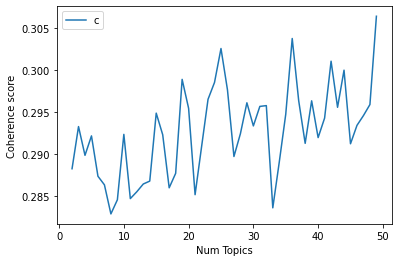

In [144]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [145]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 3))

Num Topics = 2  has Coherence Value of 0.288
Num Topics = 3  has Coherence Value of 0.293
Num Topics = 4  has Coherence Value of 0.29
Num Topics = 5  has Coherence Value of 0.292
Num Topics = 6  has Coherence Value of 0.287
Num Topics = 7  has Coherence Value of 0.286
Num Topics = 8  has Coherence Value of 0.283
Num Topics = 9  has Coherence Value of 0.285
Num Topics = 10  has Coherence Value of 0.292
Num Topics = 11  has Coherence Value of 0.285
Num Topics = 12  has Coherence Value of 0.285
Num Topics = 13  has Coherence Value of 0.286
Num Topics = 14  has Coherence Value of 0.287
Num Topics = 15  has Coherence Value of 0.295
Num Topics = 16  has Coherence Value of 0.292
Num Topics = 17  has Coherence Value of 0.286
Num Topics = 18  has Coherence Value of 0.288
Num Topics = 19  has Coherence Value of 0.299
Num Topics = 20  has Coherence Value of 0.295
Num Topics = 21  has Coherence Value of 0.285
Num Topics = 22  has Coherence Value of 0.291
Num Topics = 23  has Coherence Value of 0.2

In [146]:
# # based on the coherence value, I am going to increase the number of topics to 15 
# # Creating the object for LDA model using gensim library
# LDA = gensim.models.ldamodel.LdaModel

# # Build LDA model
# lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=15, random_state=100,
#                 chunksize=90, passes=50,iterations=100)

In [147]:
# # I am anticipating a lower perplexity score and a higher coherence score
# #how to know how good our model is
# print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
# from gensim.models.coherencemodel import CoherenceModel
# coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

In [148]:
# # Visualize the topics
# #https://github.com/bmabey/pyLDAvis
# #https://speakerdeck.com/bmabey/visualizing-topic-models
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
# #vis
# pyLDAvis.save_html(vis, 'lda.html')

In [149]:
%%capture
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

In [150]:
data = df['Abstract'].tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['background', 'in', 'december', 'covid', 'broke', 'wuhan', 'china', 'leading', 'national', 'international', 'disruptions', 'health', 'care', 'business', 'education', 'transportation', 'nearly', 'every', 'aspect', 'daily', 'lives', 'artificial', 'intelligence', 'ai', 'leveraged', 'amid', 'covid', 'pandemic', 'however', 'little', 'known', 'use', 'supporting', 'public', 'health', 'efforts', 'objective', 'this', 'scoping', 'review', 'aims', 'explore', 'ai', 'technology', 'used', 'covid', 'pandemic', 'reported', 'literature', 'thus', 'first', 'review', 'describes', 'summarizes', 'features', 'identified', 'ai', 'techniques', 'data', 'sets', 'used', 'development', 'validation', 'methods', 'scoping', 'review', 'conducted', 'following', 'guidelines', 'prisma', 'scr', 'preferred', 'reporting', 'items', 'systematic', 'reviews', 'meta', 'analyses', 'extension', 'scoping', 'reviews', 'we', 'searched', 'commonly', 'used', 'electronic', 'databases', 'eg', 'medline', 'embase', 'psycinfo', 'april', '

In [151]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [152]:
from gensim.utils import lemmatize, simple_preprocess

In [153]:
%%capture
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

In [155]:
%%capture
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=12, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=80,
                                           passes=45,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

#print(lda_model.print_topics())

In [156]:
print(lda_model.print_topics())

[(0, '0.019*"compare" + 0.016*"year" + 0.015*"increase" + 0.014*"factor" + 0.013*"child" + 0.013*"stroke" + 0.012*"rate" + 0.011*"high" + 0.010*"covid" + 0.010*"variant"'), (1, '0.039*"country" + 0.038*"case" + 0.024*"number" + 0.023*"model" + 0.019*"health" + 0.017*"use" + 0.016*"public" + 0.015*"rate" + 0.014*"death" + 0.013*"datum"'), (2, '0.043*"treatment" + 0.024*"drug" + 0.023*"viral" + 0.022*"cell" + 0.019*"virus" + 0.016*"therapeutic" + 0.016*"therapy" + 0.013*"infection" + 0.011*"may" + 0.011*"use"'), (3, '0.028*"program" + 0.026*"mutation" + 0.021*"app" + 0.020*"parameter" + 0.015*"option" + 0.013*"precaution" + 0.013*"criterion" + 0.010*"function" + 0.010*"cross" + 0.010*"vitamin"'), (4, '0.017*"vaccine" + 0.015*"pandemic" + 0.014*"disease" + 0.014*"infection" + 0.012*"virus" + 0.010*"cause" + 0.010*"spread" + 0.010*"health" + 0.009*"covid" + 0.009*"provide"'), (5, '0.033*"care" + 0.030*"patient" + 0.024*"pandemic" + 0.016*"practice" + 0.014*"service" + 0.011*"cancer" + 0.01

In [158]:
# each document is compsed of multiple topics 
#one of the topics is more dominant
# below we see the weight of each topic 
# it show the keywords for each topic
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(-20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.4006,"covid, study, use, risk, result, method, include, may, control, effect","[break, lead, national, disruption, health, care, business, education, transportation, nearly, a..."
1,1,9.0,0.5183,"covid, study, use, risk, result, method, include, may, control, effect","[recent, take, toll, world, health, care, infrastructure, social, economic, psychological, human..."
2,2,5.0,0.4869,"care, patient, pandemic, practice, service, cancer, health, recommendation, clinical, country","[large, collaborative, practice, clinic, type, patient, follow, clinic, typically, complex, vuln..."
3,3,9.0,0.4394,"covid, study, use, risk, result, method, include, may, control, effect","[case, report, organization, later, case, attribute, novel, respiratory, virus, currently, know,..."
4,4,11.0,0.3370,"region, show, recovery, spread, virus, transmission, preparedness, human, epidemic, genetic","[pandemic, many, suffer, shortage, medical, resource, particularly, paper, propose, game, theore..."
...,...,...,...,...,...
1494,1494,9.0,0.2994,"covid, study, use, risk, result, method, include, may, control, effect","[background, current, covid, pandemic, challenge, infrastructure, cope, pandemic, substantial, c..."
1495,1495,2.0,0.4598,"treatment, drug, viral, cell, virus, therapeutic, therapy, infection, may, use","[introduction, appendectomy, remain, gold, standard, treating, uncomplicated, complicated, appen..."
1496,1496,4.0,0.4408,"vaccine, pandemic, disease, infection, virus, cause, spread, health, covid, provide","[impact, water, wastewater, utility, new, profound, way, must, still, provide, vital, service, d..."
1497,1497,7.0,0.5159,"student, participant, study, covid, health, use, score, level, high, knowledge","[objective, increase, severity, essential, dental, health, care, professional, dhcps, prepared, ..."


In [159]:
df_dominant_topic['Dominant_Topic'].value_counts()

6.0     409
4.0     273
7.0     209
9.0     156
1.0     140
5.0     136
2.0      74
0.0      39
11.0     38
8.0      25
3.0      11
10.0      9
Name: Dominant_Topic, dtype: int64

In [160]:
# The most representative sentence for each topic
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(12)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.7075,"compare, year, increase, factor, child, stroke, rate, high, covid, variant","[lead, care, system, worldwide, aim, seek, measure, global, impact, covid, pandemic, volume, mec..."
1,1.0,0.9940,"country, case, number, model, health, use, public, rate, death, datum","[country, devise, public, transmission, public, health, population, significantly, increase, dis..."
2,2.0,0.6701,"treatment, drug, viral, cell, virus, therapeutic, therapy, infection, may, use","[severe, respiratory, disease, associate, human, infection, death, country, approve, treatment, ..."
3,3.0,0.5417,"program, mutation, app, parameter, option, precaution, criterion, function, cross, vitamin",[figure]
4,4.0,0.9323,"vaccine, pandemic, disease, infection, virus, cause, spread, health, covid, provide","[novel, origin, reach, pandemic, stage, virus, use, initiate, cascade, event, lead, infection, s..."
5,5.0,0.9857,"care, patient, pandemic, practice, service, cancer, health, recommendation, clinical, country","[outbreak, general, public, continue, unravel, seem, high, risk, continue, grow, essential, expl..."
6,6.0,0.9310,"patient, covid, study, symptom, clinical, case, infection, result, high, disease","[show, characteristic, radiographic, finding, patient, use, diagnosis, follow, patient, study, a..."
7,7.0,0.8804,"student, participant, study, covid, health, use, score, level, high, knowledge","[background, associate, several, stressful, factor, negatively, affect, people, sleep_quality, m..."
8,8.0,0.5410,"positive, practice, dental, perception, sample, pharmacist, test, professional, role, dentist","[study, aim, study, evaluate, performance, new, enzyme, link, immunosorbent, assay, kit, detect,..."
9,9.0,0.9525,"covid, study, use, risk, result, method, include, may, control, effect","[public, health, recommendation, governmental, measure, result, numerous, restriction, daily, li..."


In [78]:
df_dominant_topic.to_excel("df_dominant_topic.xlsx") 

In [79]:
sent_topics_sorteddf_mallet.to_excel("sent_topics.xlsx")

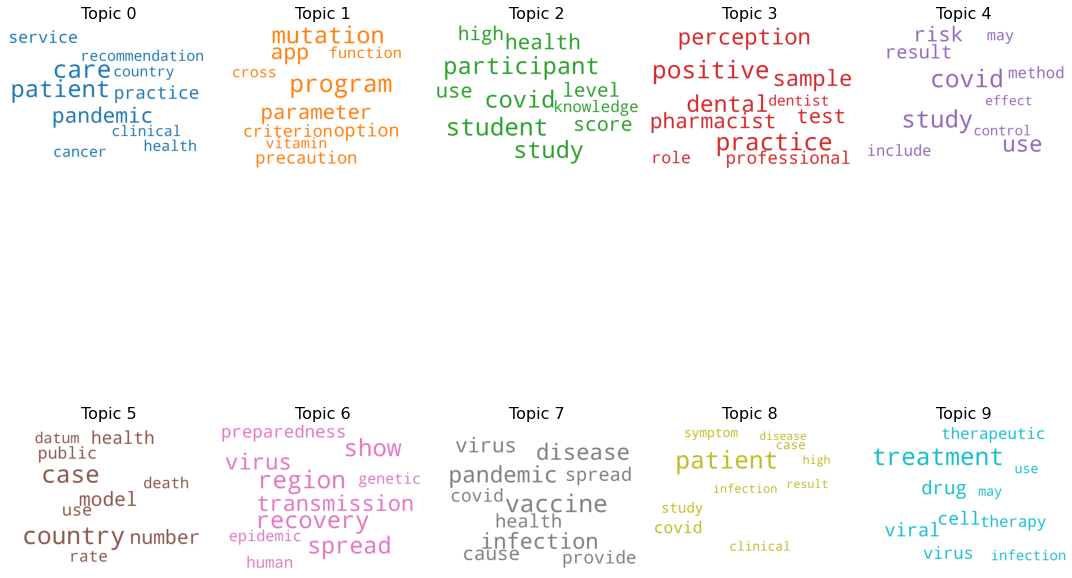

In [80]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig('lit review 3.png')

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,375,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.margins(0.025)
plt.show()

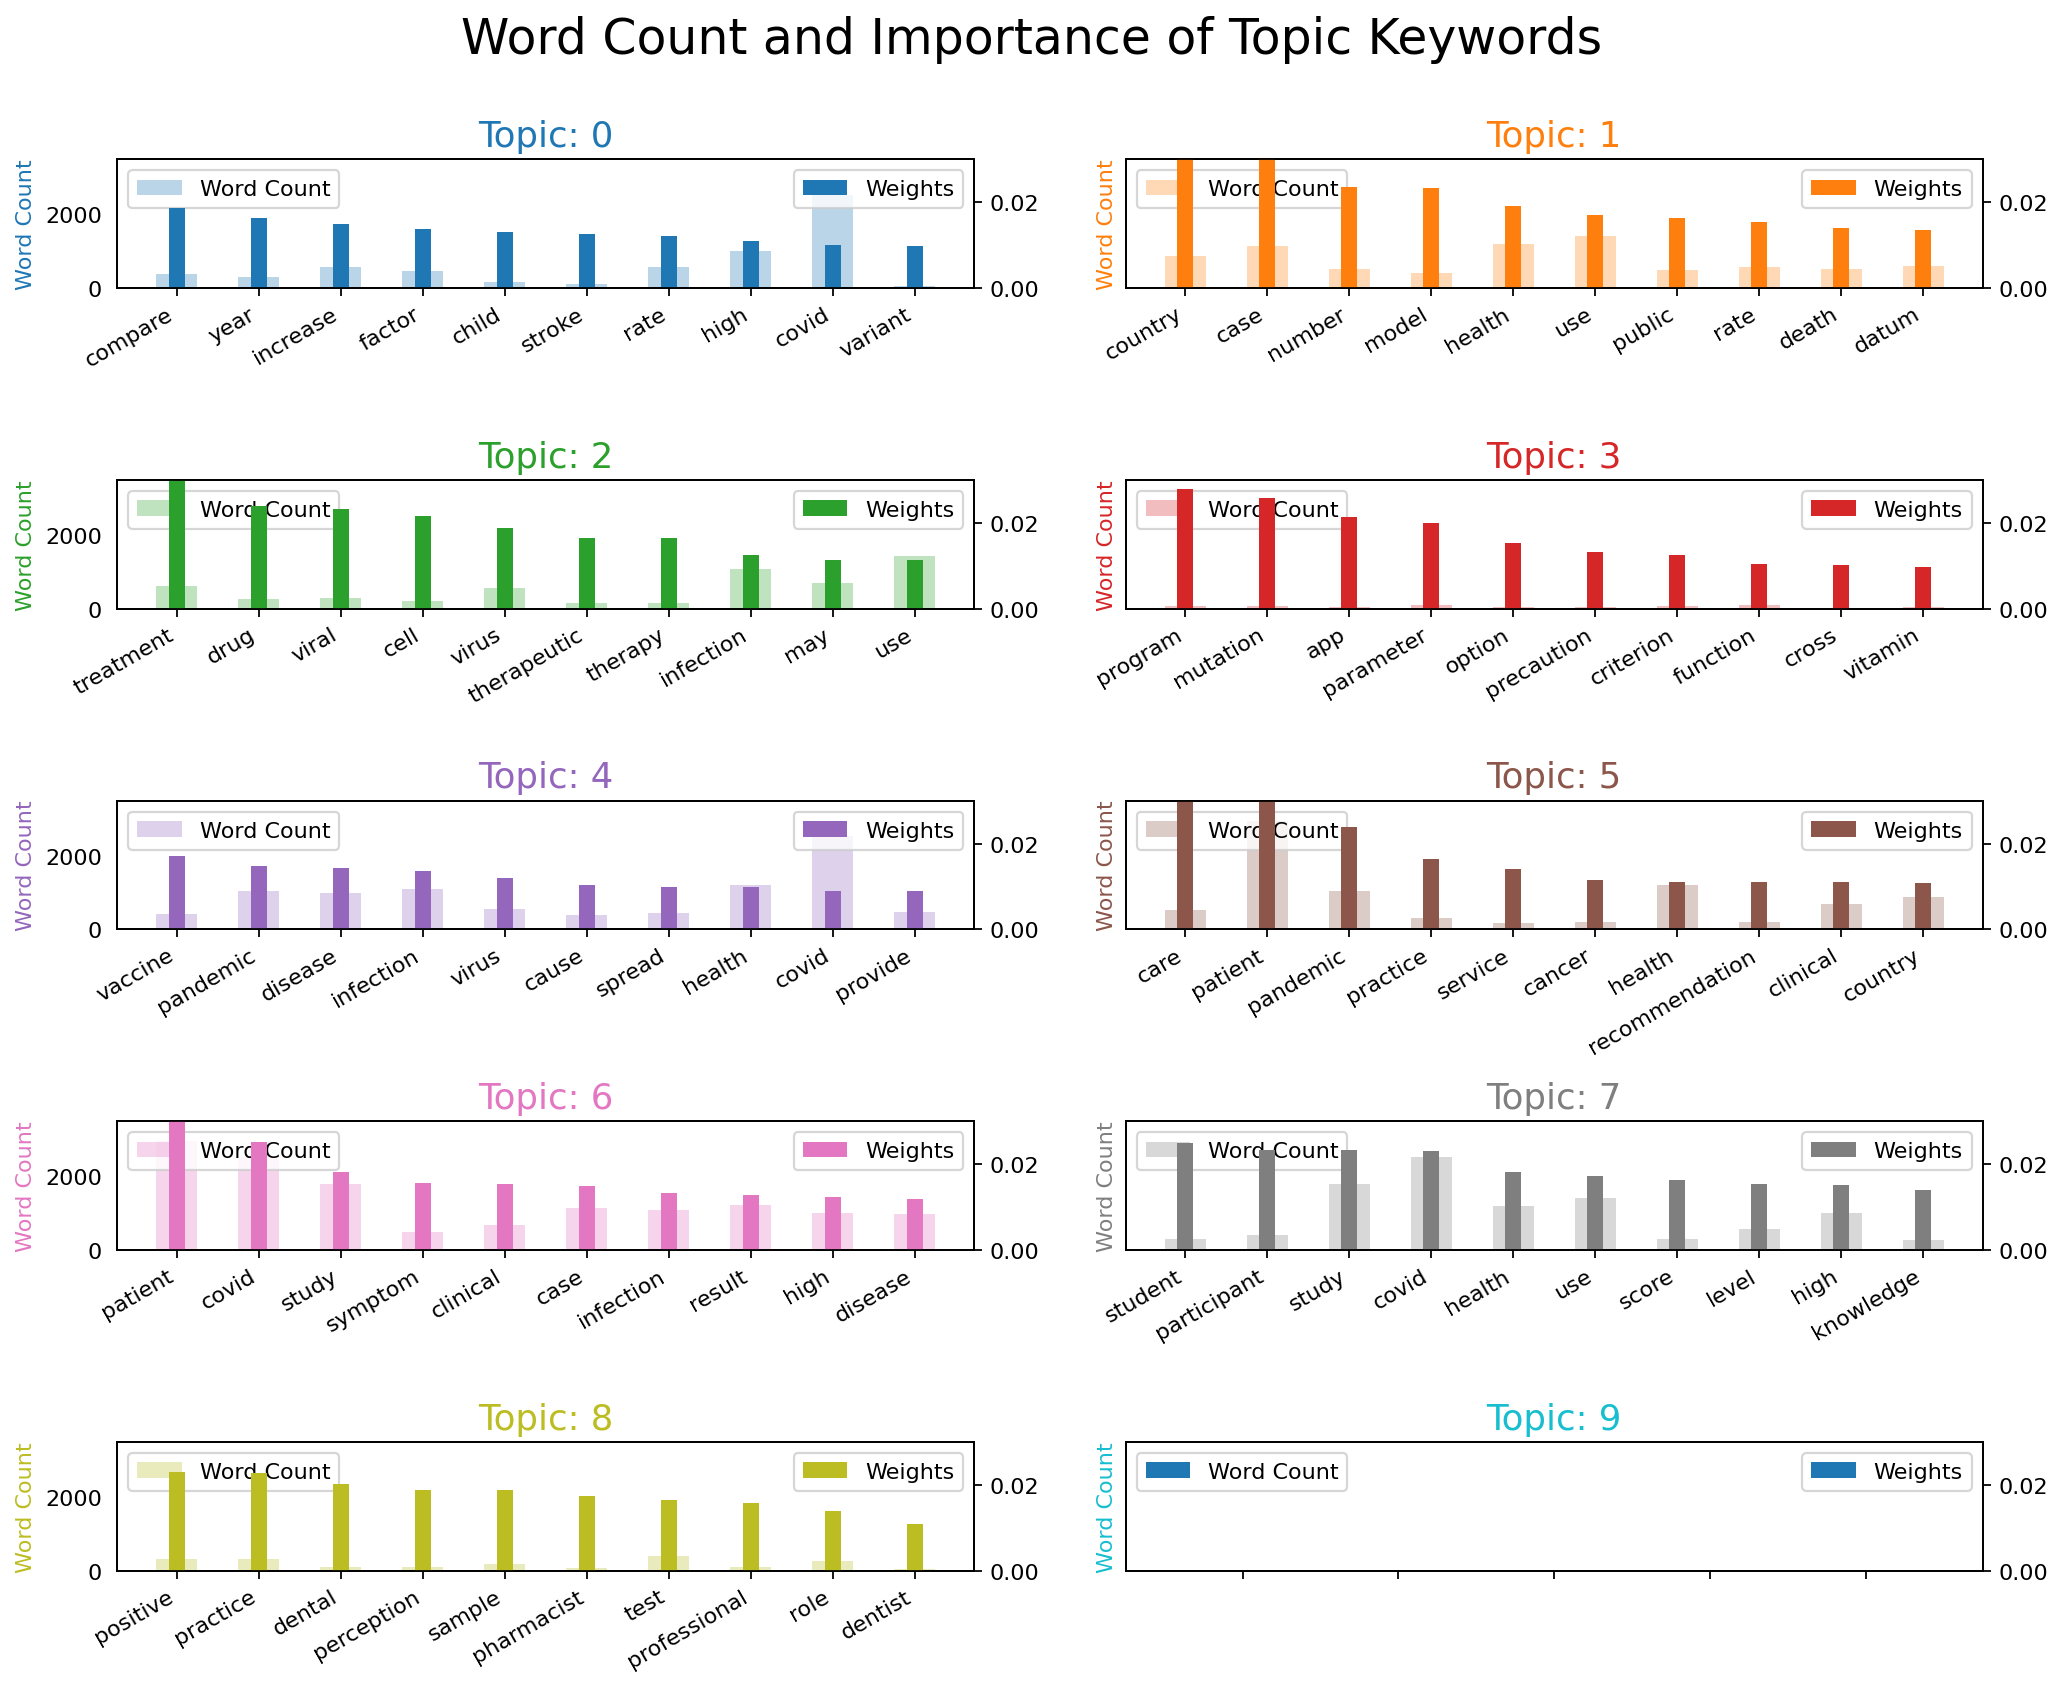

In [81]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(13,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.margins(0.025)
plt.savefig('lit review 2.png')

<Figure size 432x288 with 0 Axes>

In [161]:
# # Get topic weights and dominant topics ------------
# from sklearn.manifold import TSNE
# from bokeh.plotting import figure, output_file, show
# from bokeh.models import Label
# from bokeh.io import output_notebook

# # Get topic weights
# topic_weights = []
# for i, row_list in enumerate(lda_model[corpus]):
#     topic_weights.append([w for i, w in row_list[0]])

# # Array of topic weights    
# arr = pd.DataFrame(topic_weights).fillna(0).values

# # Keep the well separated points (optional)
# arr = arr[np.amax(arr, axis=1) > 0.35]

# # Dominant topic number in each doc
# topic_num = np.argmax(arr, axis=1)

# # tSNE Dimension Reduction
# tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
# tsne_lda = tsne_model.fit_transform(arr)

# # Plot the Topic Clusters using Bokeh
# output_notebook()
# n_topics = 12
# mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
# plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
#               plot_width=900, plot_height=700)
# plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
# show(plot)
# #plt.savefig('t-SNE')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 988 samples in 0.002s...
[t-SNE] Computed neighbors for 988 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 988 / 988
[t-SNE] Mean sigma: 0.109531


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.970387


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:348: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max


[t-SNE] KL divergence after 1000 iterations: 0.654248


IndexError: ignored